In [1]:
%autosave 11

Autosaving every 11 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Define parameters and scores for plotting

# Define parameters and scores for plotting

version_numbers = [47, 13, 40, 49, 50]
Runtime = [31.8, 215.9, 33.3, 39.1, 48.3]
PRIVATE_scores = [0.803, 0.792, 0.797, 0.798, 0.794]
public_scores = [0.812, 0.814, 0.807, 0.806, 0.807]

versions = [
    {
        'iterations'   : 230,
        'learning_rate': 0.66,
        'depth'        : 4,
        'border_count' : 1167,
    },
    {
        'depth'        : 2,
        'learning_rate': 0.05,
        'iterations'   : 3000,
        'border_count' : 254, # default
    },
    {
        'iterations'   : 250,
        'learning_rate': 0.66,
        'depth'        : 4,
        'border_count' : 1200,
    },
    {
        'depth'        : 3,
        'learning_rate': 0.7,
        'iterations'   : 300,
        'border_count' : 1500
    },
    {
        'depth'        : 5,
        'learning_rate': 0.4,
        'iterations'   : 300,
        'border_count' : 1024
    },
]
# Need to check the feature Set of the Versions once more

In [4]:
labels = list(versions[0].keys())

# Generate Final_Score by multiplying each element of the first array by 0.52 and each element of the second array by 0.48
final_Score = [round((x * 0.52) + (y * 0.48),3) for x, y in zip(public_scores, PRIVATE_scores)]
final_Score 

[0.808, 0.803, 0.802, 0.802, 0.801]

In [5]:
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(versions)
#df = df[["depth_CATB","learning_rate_CATB","iterations_CATB","metric_LGBM","is_unbalance_LGBM"]]
df

,iterations,learning_rate,depth,border_count
0,230,0.66,4,1167
1,3000,0.05,2,254
2,250,0.66,4,1200
3,300,0.70,3,1500
4,300,0.40,5,1024


In [6]:
# Scaling or mapping functions
def scale_column(column):
    if column.dtype == 'bool':
        return column.astype(int), {True: 1, False: 0}
    elif column.dtype == 'object':
        categories = column.unique()
        mapping = {category: i / (len(categories)-1) for i, category in enumerate(categories)}
        return column.map(mapping), mapping
    else:
        return (column - column.min()) / (column.max() - column.min()), (column.min(), column.max())

# Apply scaling or mapping to each column and store scaling factors or mappings
column_mappings = {}
new_df = pd.DataFrame()
for col in df.columns:
    new_df[col], column_mappings[col] = scale_column(df[col])

print("Mapping or Scaling Factors:")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors:
iterations: (230, 3000)
learning_rate: (0.05, 0.7)
depth: (2, 5)
border_count: (254, 1500)


,iterations,learning_rate,depth,border_count
0,0.000000,0.938462,0.666667,0.732745
1,1.000000,0.000000,0.000000,0.000000
2,0.007220,0.938462,0.666667,0.759230
3,0.025271,1.000000,0.333333,1.000000
4,0.025271,0.538462,1.000000,0.617978


In [7]:
# Round the values in new_df to 3 decimal places
new_df = new_df.round(3)

# Round the values in column_mappings to 3 decimal places if they are numeric
for col, mapping in column_mappings.items():
    if isinstance(mapping, dict):
        column_mappings[col] = {k: round(v, 3) for k, v in mapping.items()}
    elif isinstance(mapping, tuple):
        column_mappings[col] = tuple(round(val, 3) for val in mapping)

# Print the updated mappings
print("Mapping or Scaling Factors (After Rounding):")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors (After Rounding):
iterations: (230, 3000)
learning_rate: (0.05, 0.7)
depth: (2, 5)
border_count: (254, 1500)


,iterations,learning_rate,depth,border_count
0,0.000,0.938,0.667,0.733
1,1.000,0.000,0.000,0.000
2,0.007,0.938,0.667,0.759
3,0.025,1.000,0.333,1.000
4,0.025,0.538,1.000,0.618


In [8]:
new_df["Score"] = pd.Series(final_Score)
new_df

,iterations,learning_rate,depth,border_count,Score
0,0.000,0.938,0.667,0.733,0.808
1,1.000,0.000,0.000,0.000,0.803
2,0.007,0.938,0.667,0.759,0.802
3,0.025,1.000,0.333,1.000,0.802
4,0.025,0.538,1.000,0.618,0.801


In [9]:
# Sort the DataFrame by scores in ascending order
new_df_sorted = new_df.sort_values(by='Score', ascending=True)
new_df_sorted

,iterations,learning_rate,depth,border_count,Score
4,0.025,0.538,1.000,0.618,0.801
2,0.007,0.938,0.667,0.759,0.802
3,0.025,1.000,0.333,1.000,0.802
1,1.000,0.000,0.000,0.000,0.803
0,0.000,0.938,0.667,0.733,0.808


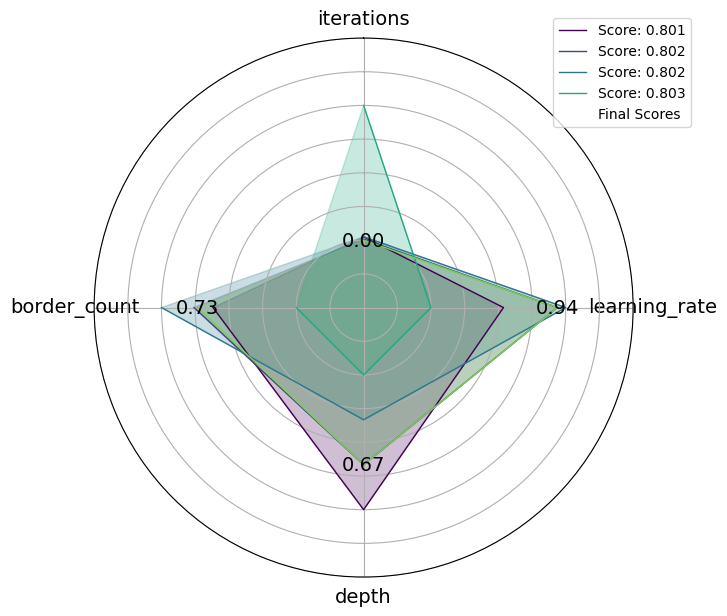

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
labels = new_df.columns[:-1]  # Exclude the 'Score' column
best_score_row = new_df_sorted.iloc[-1]
best_score = best_score_row['Score']
versions = new_df_sorted.drop(columns='Score').to_dict(orient='records')
scores = new_df_sorted['Score']

# Plot radar graph
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(17, 7), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

legend_handles = []  # List to store legend handles
legend_labels = []   # List to store legend labels

for i, (version, score) in enumerate(zip(versions, scores)):
    values = [version[key] for key in labels]
    color = plt.cm.viridis(i / len(scores))  # Adjust the color based on the position
    
    if version == best_score_row.drop('Score').to_dict():
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Score: {best_score}", color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        
        # Add radar values as text labels for the best radar graph
        for angle, value in zip(angles, values):
            ax.text(angle, value, f'{value:.2f}', color='black', fontsize=14, ha='center', va='center')
    else:
        line, = ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        legend_handles.append(line)
        legend_labels.append(f"Score: {score}")

        
legend_labels.append(f"Final Scores")
line, = ax.plot(angles, values, linewidth=0, linestyle='solid', color="white")
legend_handles.append(line)


ax.set_yticklabels([])

# Set custom positions for the x-axis tick marks
custom_positions = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
#custom_positions[1] += 0.066  # Shift the tick mark positions
# custom_positions[11] += 0.066  # Shift the tick mark positions
ax.set_xticks(custom_positions)
ax.set_xticklabels(labels, fontsize=14)

# Set axis limits to slightly lower and higher values
ax.set_ylim(-0.5, 1.5)

# Add legend with all scores
ax.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.12, 1.05))

plt.show()


# Chat GPT links:

1) https://chat.openai.com/share/c73821db-2d09-4851-9e95-65c09101fef2

2) https://chat.openai.com/share/f3520156-c785-4193-9e90-c27fadf80c57

3) https://chat.openai.com/share/6f137401-1edf-4774-8f49-d62df8591125